# EDA

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import quantile_transform

import commons

%matplotlib inline
sns.set()

In [6]:
data= commons.get_data()
data.head()

,Recency,Frequency,Amount,Times,Donation
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [7]:
data.describe()

,Recency,Frequency,Amount,Times,Donation
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


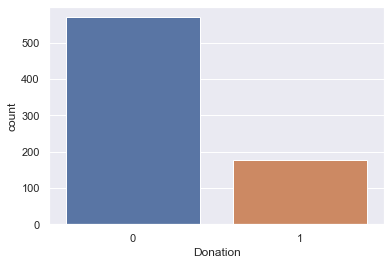

In [8]:
# data['Donation'].plot.hist(bins=2)
sns.countplot(x='Donation', data=data);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00D2BD90>,
      dtype=object)

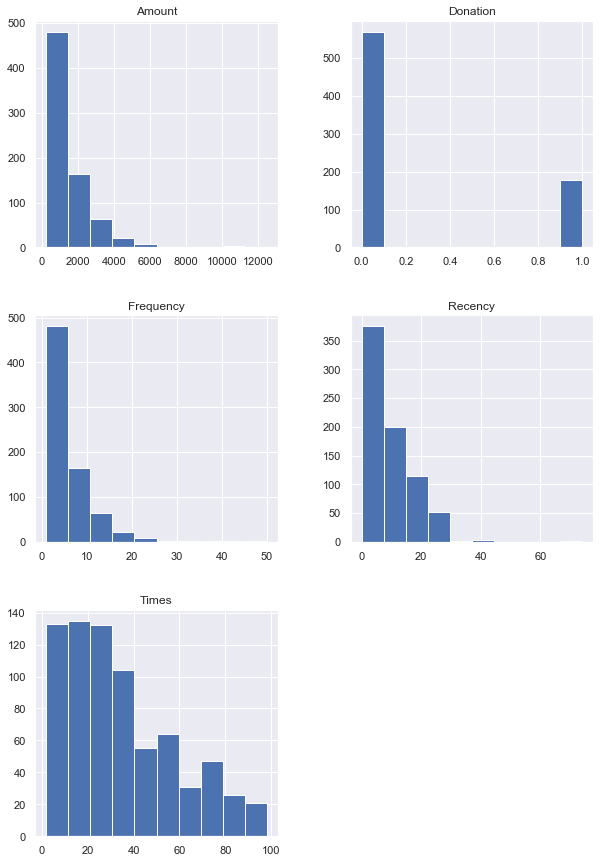

In [9]:
data.hist(figsize=(10,15))


c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


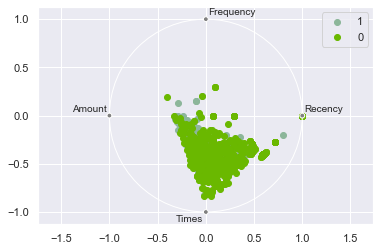

In [10]:
radviz(data, 'Donation')


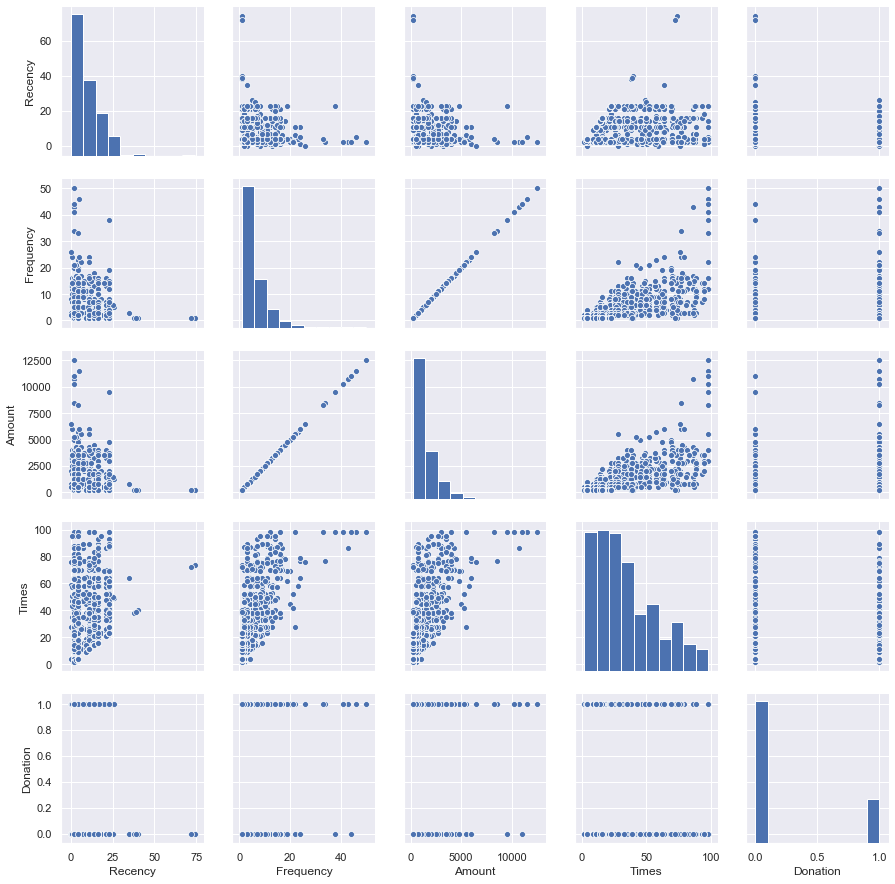

In [11]:
sns.pairplot(data, kind='scatter')
plt.show()

## Histograms

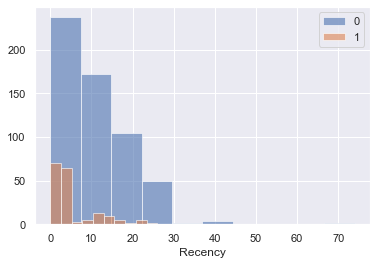

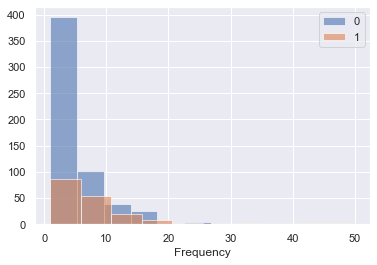

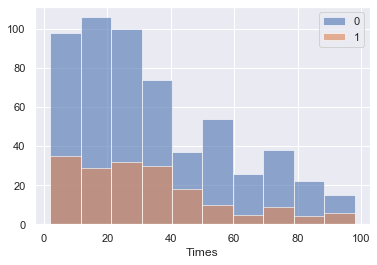

In [12]:
for col in  data.columns[[0,1,3]]:
    groups = data.groupby('Donation')[col]
    fig, ax = plt.subplots()
    
    for k, v in groups:
        v.hist(label=k, alpha=.6, ax=ax)
    
    ax.set_xlabel(col)
    ax.legend()

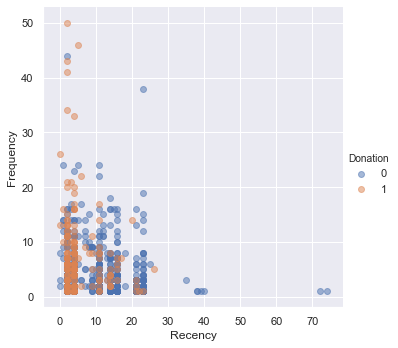

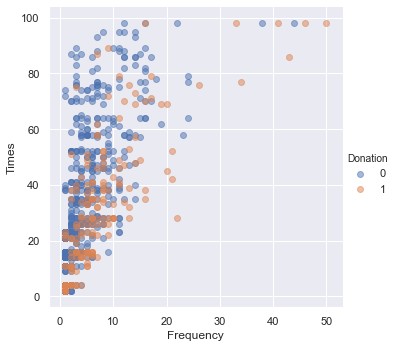

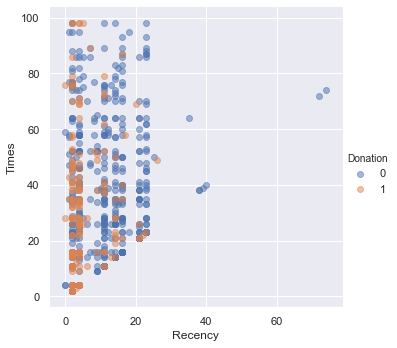

In [13]:
sns.lmplot(x='Recency', y='Frequency', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})
sns.lmplot(x='Frequency', y='Times', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})
sns.lmplot(x='Recency', y='Times', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})

In [14]:
# todo does not work! why?
# sns.pairplot(data, hue='Donation')

## PCA

In [15]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.iloc[:,[0,1,3]])
df_pca = pd.DataFrame(principalComponents, columns=['x','y'])
df_pca['Donation']=data['Donation']

c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


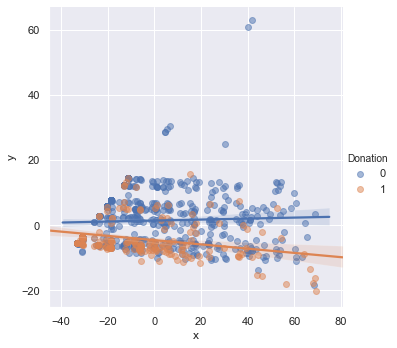

In [16]:
sns.lmplot(x='x', y='y', hue='Donation', data=df_pca, fit_reg=True, scatter_kws={'alpha':0.5})

In [17]:
## Transformation (work in progress)   

In [53]:
data = data[data['Recency'] < 50]

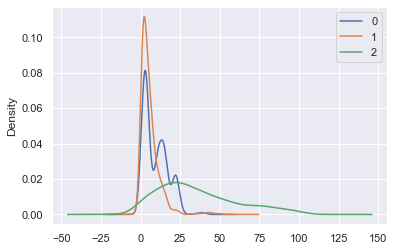

In [56]:
X = data.iloc[:, [0, 1, 3]].values
y = data.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

pd.DataFrame(x_train).plot.kde()

c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)
c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (746). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


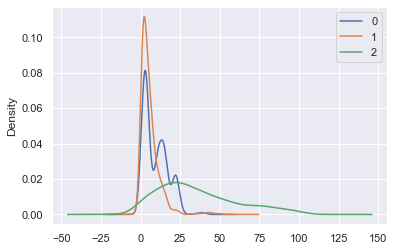

In [58]:
# transformer = PowerTransformer()
# transformer = StandardScaler()
x_train_trans = quantile_transform(data.iloc[:,[0]],output_distribution='normal').squeeze()
# x_test = pd.np.log1p(x_test)

pd.DataFrame(x_train).plot.kde()

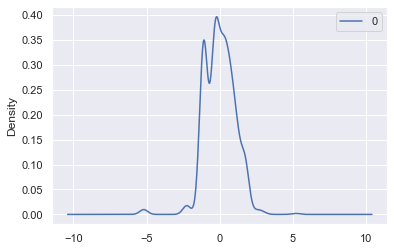

In [59]:
pd.DataFrame(x_train_trans).plot.kde()

